In [1]:
import time
import numpy as np
from scipy import signal
from itertools import product
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
# Define functions
# Gaussian
def fct_Gauss(x,esp,sig):
    return (1/(np.sqrt(2*np.pi)*sig))*np.exp(-0.5*(x-esp)**2/sig**2)

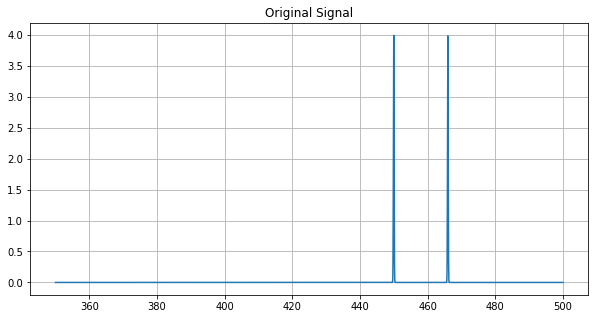

In [3]:
# Create a very narrow Gaussian incoming signal
sig_in = 0.1 # start with a small fixed variance
n = 10000     # many steps to make the gaussian extremly narrow but not too many cuz time
n_pic = 2     # number of peaks in the signal
wavelength = np.linspace(350,500,n)
distance = np.linspace(450,450+16,n_pic)    # distance between 2 peaks : 5nm
fi = np.zeros(n)
for i in distance:
    fi += fct_Gauss(wavelength,i,sig_in) 
plt.figure(figsize=[10,5])
plt.title("Original Signal")
plt.plot(wavelength,fi)
plt.grid(True)

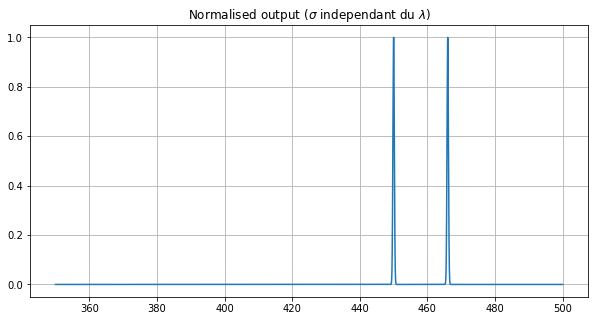

Time used: 12.99855661392212


In [4]:
start = time. time() 
R = 5000 # make a constant resolution, a small one to be less resolved
dLam = 5000/R
sigma = dLam / np.sqrt(8*np.log(2))
res_cste = np.zeros(n)
for i in range(n):
    fv = fct_Gauss(wavelength,wavelength[i],sigma**2)
    res_cste += fi[i]*fv

res_cste=res_cste/np.max(res_cste)

plt.figure(figsize=[10,5])
plt.title('Normalised output ($\sigma$ independant du $\lambda$)')
#plt.title('($\sigma$ independant du $\lambda$)')
plt.plot(wavelength,res_cste) #,label='$\sigma$ independant du $\lambda$')
plt.grid(True)
plt.show()

end = time. time()
print('Time used:',end - start)

In [5]:
distance_value = 
sigma_1 = distance_value / np.sqrt(8*np.log(2))
Sigma_conv = np.sqrt(sigma_1**2+sigma**2)
print('Distance between 2 peaks:',distance_value)
print('Sigma of input:', sigma_1)
print('Sigma of Gauss:', sigma)
print('Sigma of convolution:',Sigma_conv)
# Contrast
x_min_loc = signal.argrelmin(res_cste)[0]
f_min_loc = res_cste[x_min_loc]
x_peaks = signal.find_peaks(res_cste)[0][0]
f_peaks = res_cste[x_peaks]
contrast = (f_peaks - f_min_loc) / (f_peaks + f_min_loc)
print('contrast:',contrast)

Distance between 2 peaks: 16
Sigma of input: 6.7945744023041525
Sigma of Gauss: 0.42466090014400953
Sigma of convolution: 6.80783212106159
contrast: []


In [67]:
### now try to find the 15% contrast ###
# find the index of all minimums
x_min_loc = signal.argrelmin(res_cste)[0]
x_min_loc = x_min_loc[1:-1]
# find the values of these minimums
f_min_loc = []
for i in x_min_loc:
    f_min_loc.append(res_cste[i])
#print ('value of minimums:',f_min_loc)
# find the index of all the peaks
x_peaks = signal.find_peaks(res_cste)[0]
x_peaks = x_peaks[1:-2]
#print ('peaks located at:',x_peaks)
# values corresponding to these peaks
f_peaks = []
for i in x_peaks:
    f_peaks.append(res_cste[i])
#print ('value of peaks:',f_peaks)

# contrast = (np.max(res_cste) - fo_module[38834]) / (np.max(fo_module) + fo_module[38834])
# print ('contrast =', contrast)

contrast_all = []
for i in range(len(x_peaks)):
    contrast_all.append((f_peaks[i] - f_min_loc[i]) / (f_peaks[i] + f_min_loc[i]))
print ('smallest contrast:',np.min(contrast_all))

ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
start = time. time()
R = np.linspace(4000,5000,n)
x = np.linspace(100,1000,n)

res_cste = np.zeros(n)
for i in range(n):
    dLam = wavelength[int(n/2)]/R[int(n/2)]
    sigma = dLam / np.sqrt(8*np.log(2))
    fv = fct_Gauss(x,wavelength[i],sigma**2)
    res_cste += fi[i]*fv

res_cste=res_cste/np.max(res_cste)   
plt.figure(figsize=[10,5])
plt.title('Normalised output with [100,1000]($\sigma$ independant du $\lambda$)')
#plt.title('($\sigma$ independant du $\lambda$)')
plt.plot(wavelength,res_cste) #,label='$\sigma$ independant du $\lambda$')
plt.grid(True)
plt.show()

end = time. time()
print('Time used:',end - start)

In [26]:
# x = np.linspace(100,1000,n)
# plt.plot(x,fct_Gauss(x,wavelength[500],sigma**2))
# print(wavelength[500])

In [21]:
### now try to find the 15% contrast ###
# find the index of all minimums
x_min_loc = signal.argrelmin(res_cste)[0]
x_min_loc = x_min_loc[1:-1]
# find the values of these minimums
f_min_loc = []
for i in x_min_loc:
    f_min_loc.append(res_cste[i])
#print ('value of minimums:',f_min_loc)
# find the index of all the peaks
x_peaks = signal.find_peaks(res_cste)[0]
x_peaks = x_peaks[1:-2]
#print ('peaks located at:',x_peaks)
# values corresponding to these peaks
f_peaks = []
for i in x_peaks:
    f_peaks.append(res_cste[i])
#print ('value of peaks:',f_peaks)

# contrast = (np.max(res_cste) - fo_module[38834]) / (np.max(fo_module) + fo_module[38834])
# print ('contrast =', contrast)

contrast_all = []
for i in range(len(x_peaks)):
    contrast_all.append((f_peaks[i] - f_min_loc[i]) / (f_peaks[i] + f_min_loc[i]))
print ('smallest contrast:',np.min(contrast_all))

smallest contrast: 0.26932215187344105


# Remark

Replacing the wavelength(350,500,n) with x(100,1000,n)

peaks: 147 invariant, however all got squeezed into smaller interval (problematique)

smallest contrast: 0.2760154582716733 -> 0.26932215187344105




In [72]:
np.sqrt(0.01+sigma**2)

0.10631547370779176

In [76]:
sigma

0.03609681356729653

In [74]:
wavelength[int(n/2)]

425.007500750075

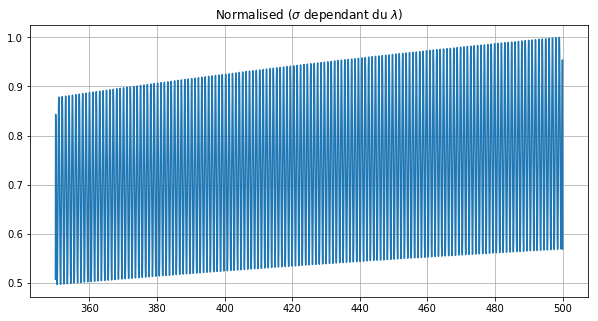

Time used: 13.331050634384155


In [32]:
start = time. time()
R = np.linspace(4000,5000,n)

res_var = np.zeros(n)
for i in range(n):
    dLam = wavelength[i]/R[i]
    sigma = dLam / np.sqrt(8*np.log(2))
    fv = fct_Gauss(wavelength,wavelength[i],sigma**2)
    res_var += fi[i]*fv
    
res_var=res_var/np.max(res_var) # normaliser

plt.figure(figsize=[10,5])
plt.title('Normalised ($\sigma$ dependant du $\lambda$)')
plt.plot(wavelength,res_var)
plt.grid(True)
plt.show()

end = time. time()
print('Time used:',end - start)

In [33]:
print(np.trapz(fi,wavelength))
print(np.trapz(res_cste,wavelength))
print(np.trapz(res_var,wavelength))

118.10599771791092
19.577321802727738
110.7960456844616


In [82]:
a = 1-((np.log(0.54369)*2*4)/(8*np.log(2)))

In [86]:
np.sqrt((-np.log(0.54369)*2*4)/a)

1.610674100698411